<h2 style="color:salmon">Decision Trees</h2>

In [1]:
from train import *
# from compare import *
from statistics import mode
from nested_lookup import nested_lookup
from predict import *
from visualise import *
import seaborn as sn
import matplotlib.pyplot as plt



In [2]:
org_features = ["Class","Age","Menopause","Tumor-Size","Inv-Node","Node-Caps","Deg-Malig","Breast","Breast-Quad","Irradiat"]
features = ["Irradiat","Age","Menopause","Tumor-Size","Inv-Node","Node-Caps","Deg-Malig","Breast","Breast-Quad"]
features_wc = ["Irradiat","Age","Menopause","Tumor-Size","Inv-Node","Node-Caps","Deg-Malig","Breast","Breast-Quad","Class"]
dataset = pd.read_csv("breast-cancer.csv",sep=",",header=None,names=org_features)

In [3]:
# Swap last column and first column - ID3 algorithm takes last column as class
ndataset = dataset[features_wc]
ndataset = ndataset.sample(frac=1)
filter_dataset = ndataset.replace("?",np.NaN)


# Remove all of the NaN values
drop_filter_dataset = filter_dataset.dropna(how="any").reset_index(drop=True)



In [4]:
def convert_first(class_list):
	class_dict = {"recurrence-events":1,"no-recurrence-events":0}
	class_list = [class_dict[item] for item in class_list]
	return class_list

def convert(class_list):
	class_unique = np.unique(class_list)
	class_dict = {}
	for index in range(len(class_unique)):
		class_dict[class_unique[index]] = index

	class_list =  [class_dict[item] for item in class_list]
	return class_list



#Accuracy

In [5]:
def accuracy(TP,TN,FP,FN):
	numerator = TP + TN
	denominator = TP + TN + FP + FN
	return numerator/denominator
	

# When it actually says, i.e real data
#how often does it predict yes
def recall(TP,FN):
  return TP/(TP+FN)


#When it predicts yes , how often
def precision(TP,FP):
	return TP/(TP+FP)




def f_measure(recall,precision):
	numerator = 2* recall * precision
	denominator = recall + precision
	return numerator / denominator



def prediction_accuracy(test_data,model):

	# Collect all the predictions
	prediction_list = predict_dataset(model,test_data)
	convert_pred = convert(prediction_list)
	# # Collect the actual values
	actual = list(test_data.iloc[:,-1])
	convert_act = convert(actual)

	data = {"y_act":convert_act,"y_pred":convert_pred}
	df = pd.DataFrame(data,columns = ["y_act","y_pred"])
	conf_matrix = pd.crosstab(df["y_act"],df["y_pred"],rownames=["Actual"],colnames=["Predicted"],margins=True,margins_name="Total")
	TP = conf_matrix[1][1]
	TN = conf_matrix[0][0]
	FP = conf_matrix[1][0]
	FN = conf_matrix[0][1]
	acc = accuracy(TP,TN,FP,FN)
	recall_data = recall(TP,FN)
	precision_data = precision(TP,FP)
	f_measure_data = f_measure(recall_data,precision_data)
	return [{"Accuracy":acc, "Recall":recall_data,"Precision":precision_data,"F Measure":f_measure_data},conf_matrix]





def show_heatmap(conf_matrix):
	sn.heatmap(conf_matrix,annot=True)
	plt.title("Breast Cancer: Confusion Matrix")
	plt.show()



In [6]:
def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)


def visit(node, parent=None):
    for k,v in node.items():
        if isinstance(v, dict):      
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            draw(parent, k)         
            draw(k, k+'_'+v)


In [7]:
#Split the data
split = len(drop_filter_dataset) * 75//100
train_data = drop_filter_dataset[:split]
test_data = drop_filter_dataset[split:]

model = ID3(train_data,train_data)



In [8]:
model

{'Tumor-Size': {'30-34': {'Deg-Malig': {3: {'Breast-Quad': {'left_up': {'Menopause': {'premeno': 'recurrence-events',
        'ge40': 'recurrence-events',
        'lt40': 'no-recurrence-events'}},
      'left_low': {'Age': {'50-59': 'no-recurrence-events',
        '60-69': 'no-recurrence-events',
        '40-49': 'recurrence-events',
        '30-39': 'no-recurrence-events'}},
      'right_up': 'recurrence-events',
      'right_low': 'recurrence-events',
      'central': 'recurrence-events'}},
    2: {'Inv-Node': {'0-2': {'Irradiat': {'no': {'Breast': {'left': {'Node-Caps': {'no': 'no-recurrence-events'}},
          'right': 'no-recurrence-events'}},
        'yes': 'no-recurrence-events'}},
      '6-8': 'no-recurrence-events',
      '3-5': 'recurrence-events',
      '9-11': 'recurrence-events'}},
    1: 'no-recurrence-events'}},
  '25-29': 'no-recurrence-events',
  '20-24': 'no-recurrence-events',
  '15-19': 'no-recurrence-events',
  '10-14': 'no-recurrence-events',
  '35-39': 'no-recur

Accuracy
{'Accuracy': 0.74285714285714288, 'Recall': 0.1111111111111111, 'Precision': 0.5, 'F Measure': 0.1818181818181818}


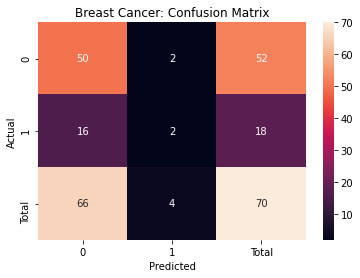

In [9]:
def decision_tree(test_data,model):
	print("Accuracy")
	print(prediction_accuracy(test_data,model)[0])
	show_heatmap(prediction_accuracy(test_data,model)[1])

decision_tree(test_data,model)
